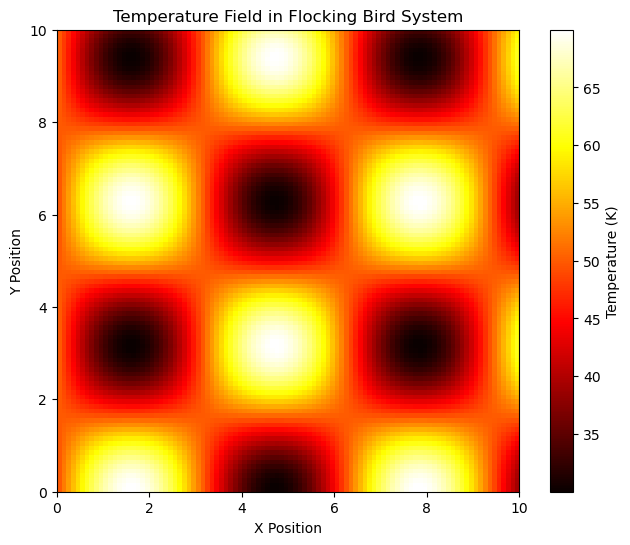

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated temperature field (for example purposes)
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
temperature = np.sin(X) * np.cos(Y) * 20 + 50  # dummy temperature values

plt.figure(figsize=(8,6))
plt.imshow(temperature, extent=[0,10,0,10], origin='lower', cmap='hot')
plt.colorbar(label='Temperature (K)')
plt.title('Temperature Field in Flocking Bird System')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()

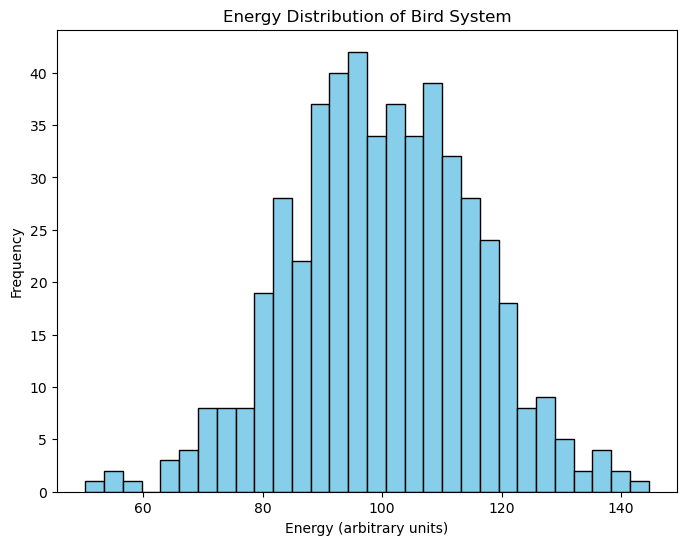

In [4]:
# Simulated energy data (e.g., kinetic energy values)
energy = np.random.normal(loc=100, scale=15, size=500)

plt.figure(figsize=(8,6))
plt.hist(energy, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Energy (arbitrary units)')
plt.ylabel('Frequency')
plt.title('Energy Distribution of Bird System')
plt.show()

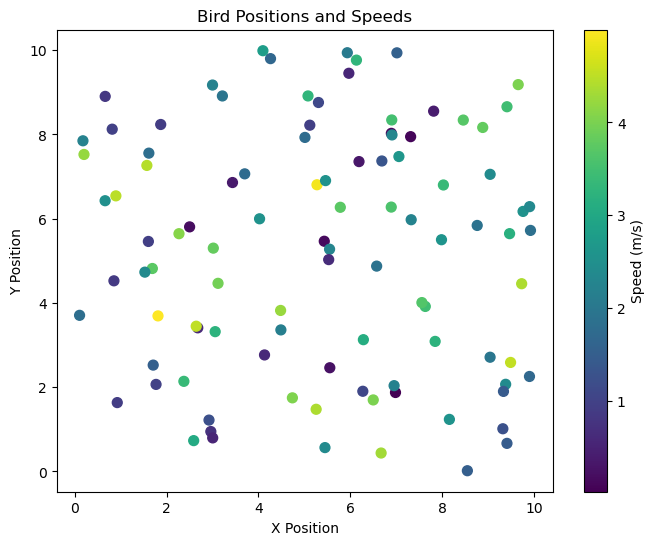

In [6]:
# Simulated bird positions and speeds
num_birds = 100
positions = np.random.rand(num_birds, 2) * 10  # positions in a 10x10 domain
speeds = np.random.rand(num_birds) * 5  # speeds between 0 and 5 m/s

plt.figure(figsize=(8,6))
scatter = plt.scatter(positions[:,0], positions[:,1], c=speeds, cmap='viridis', s=50)
plt.colorbar(scatter, label='Speed (m/s)')
plt.title('Bird Positions and Speeds')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()

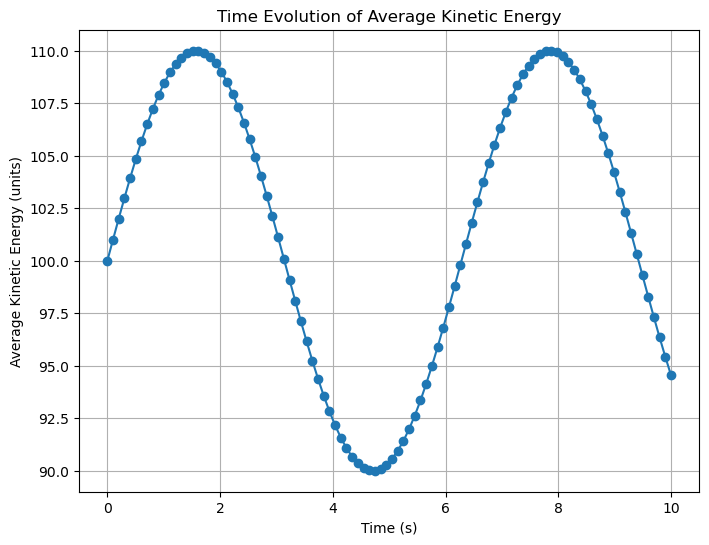

In [8]:
# Simulated time evolution of average kinetic energy
time = np.linspace(0, 10, 100)
avg_energy = 100 + 10 * np.sin(time)  # dummy data for kinetic energy

plt.figure(figsize=(8,6))
plt.plot(time, avg_energy, marker='o', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Average Kinetic Energy (units)')
plt.title('Time Evolution of Average Kinetic Energy')
plt.grid(True)
plt.show()

C:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


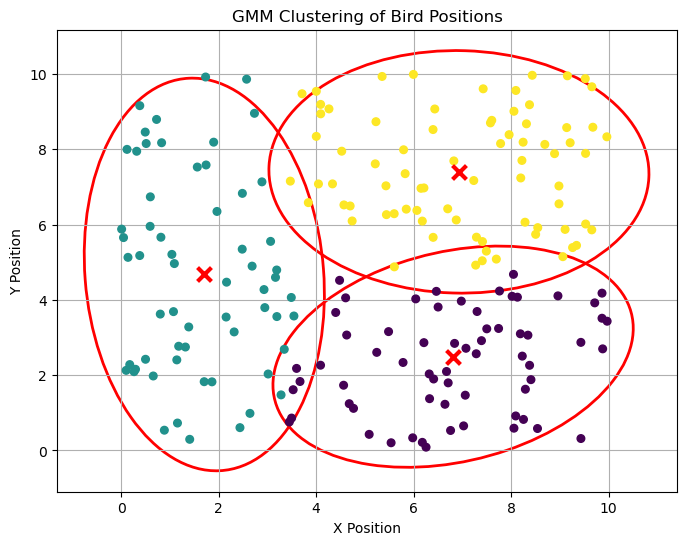

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Generate synthetic bird positions
num_birds = 200
positions = np.random.rand(num_birds, 2) * 10

# Fit GMM with 3 clusters
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(positions)
labels = gmm.predict(positions)
means = gmm.means_
covariances = gmm.covariances_

plt.figure(figsize=(8,6))
plt.scatter(positions[:, 0], positions[:, 1], c=labels, cmap='viridis', s=30, zorder=2)
plt.scatter(means[:, 0], means[:, 1], marker='x', c='red', s=100, linewidths=3, zorder=3)

def plot_cov_ellipse(cov, pos, nstd=2, **kwargs):
    # Compute eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    theta = np.degrees(np.arctan2(*eigvecs[:,0][::-1]))
    width, height = 2 * nstd * np.sqrt(eigvals)
    ellipse = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    return ellipse

ax = plt.gca()
for i in range(3):
    ellipse = plot_cov_ellipse(covariances[i], means[i], nstd=2, edgecolor='red', fc='None', lw=2)
    ax.add_patch(ellipse)

plt.title('GMM Clustering of Bird Positions')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.show()

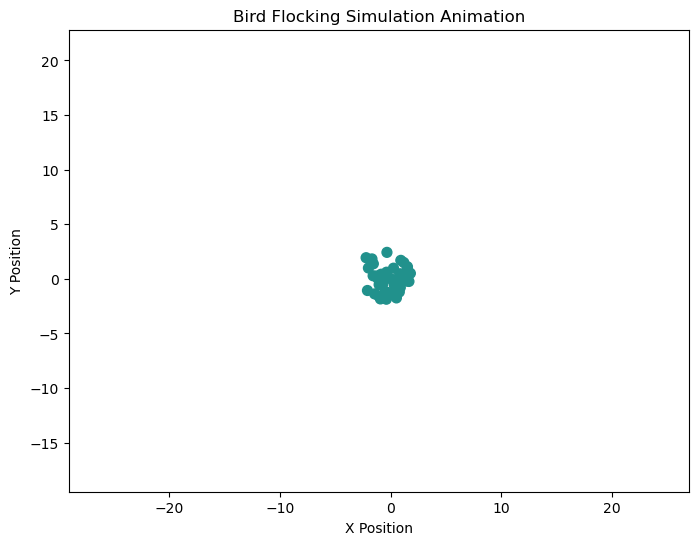

In [14]:
import matplotlib.animation as animation
# Simulate bird positions over time (e.g., a random walk)
num_birds = 50
time_steps = 100
positions = np.cumsum(np.random.randn(time_steps, num_birds, 2), axis=0)

fig, ax = plt.subplots(figsize=(8,6))
scat = ax.scatter(positions[0,:,0], positions[0,:,1], c='blue', s=50)
ax.set_xlim(np.min(positions[:,:,0]) - 1, np.max(positions[:,:,0]) + 1)
ax.set_ylim(np.min(positions[:,:,1]) - 1, np.max(positions[:,:,1]) + 1)
ax.set_title('Bird Flocking Simulation Animation')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')

def update(frame):
    data = positions[frame]
    scat.set_offsets(data)
    # Update colors based on a dummy thermodynamic property (e.g., oscillating factor)
    colors = plt.cm.viridis((np.sin(frame/10.0) + 1)/2 * np.ones(num_birds))
    scat.set_color(colors)
    return scat,

ani = animation.FuncAnimation(fig, update, frames=time_steps, interval=100, blit=True)
plt.show()

Shannon entropy (energy): 2.9846609896153864


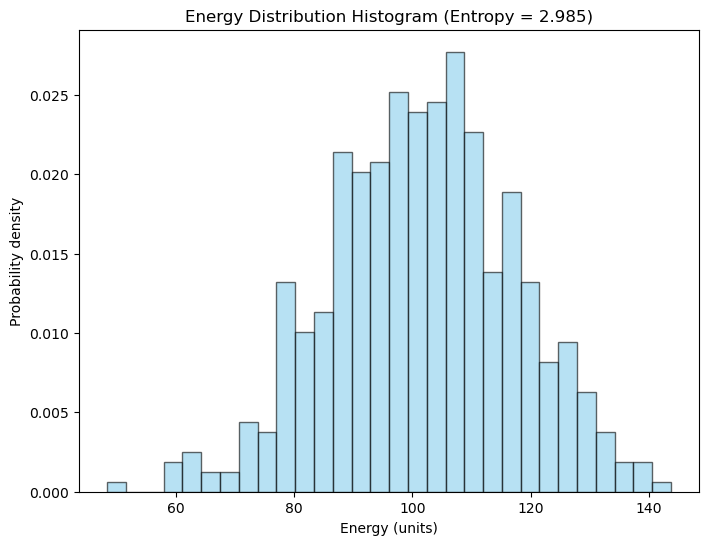

In [16]:
# Simulated energy data (e.g., kinetic energy values)
energy = np.random.normal(loc=100, scale=15, size=500)

# Compute the probability density histogram
counts, bin_edges = np.histogram(energy, bins=30, density=True)
probabilities = counts / np.sum(counts)

# Remove zero probabilities to avoid log(0)
nonzero_probs = probabilities[probabilities > 0]
entropy = -np.sum(nonzero_probs * np.log(nonzero_probs))

print("Shannon entropy (energy):", entropy)

# Plot the energy histogram with entropy value indicated
plt.figure(figsize=(8,6))
plt.hist(energy, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.xlabel('Energy (units)')
plt.ylabel('Probability density')
plt.title(f'Energy Distribution Histogram (Entropy = {entropy:.3f})')
plt.show()


Spatial entropy: 17.639438084883206


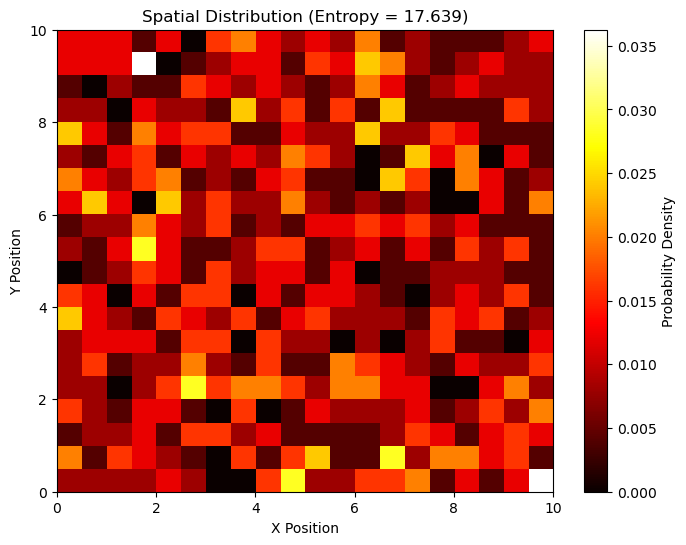

In [18]:
# Simulated bird positions (e.g., positions in a 10x10 domain)
num_birds = 1000
positions = np.random.rand(num_birds, 2) * 10

# Compute a 2D histogram for the positions
H, xedges, yedges = np.histogram2d(positions[:, 0], positions[:, 1], bins=20, density=True)
H_flat = H.flatten()
H_flat = H_flat[H_flat > 0]  # exclude zero values

spatial_entropy = -np.sum(H_flat * np.log(H_flat))
print("Spatial entropy:", spatial_entropy)

# Plot the spatial distribution
plt.figure(figsize=(8,6))
plt.imshow(H, extent=[0,10,0,10], origin='lower', cmap='hot', aspect='auto')
plt.colorbar(label='Probability Density')
plt.title(f'Spatial Distribution (Entropy = {spatial_entropy:.3f})')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()


C:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Differential entropies of GMM clusters: [3.6851201393523296, 3.8767060251389007, 3.8598234410995738]


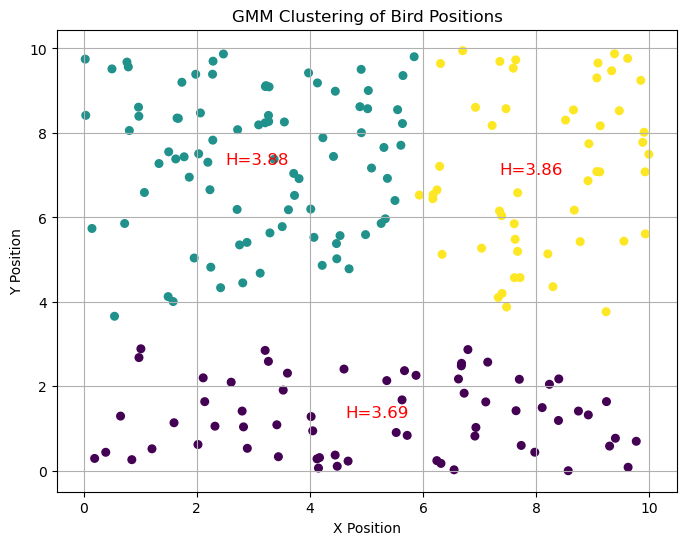

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Simulated bird positions for GMM analysis
num_birds = 200
positions = np.random.rand(num_birds, 2) * 10

# Fit a GMM with 3 clusters
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(positions)
labels = gmm.predict(positions)

# Compute differential entropy for each Gaussian cluster
entropies = []
for i in range(gmm.n_components):
    cov = gmm.covariances_[i]
    d = cov.shape[0]  # dimensionality (here, 2)
    entropy_cluster = 0.5 * np.log(((2 * np.pi * np.e) ** d) * np.linalg.det(cov))
    entropies.append(entropy_cluster)

print("Differential entropies of GMM clusters:", entropies)

# Visualize the clusters along with the computed entropies
plt.figure(figsize=(8,6))
plt.scatter(positions[:, 0], positions[:, 1], c=labels, cmap='viridis', s=30)
plt.title('GMM Clustering of Bird Positions')
plt.xlabel('X Position')
plt.ylabel('Y Position')
for i, ent in enumerate(entropies):
    plt.text(gmm.means_[i,0], gmm.means_[i,1], f"H={ent:.2f}", color='red', fontsize=12, 
             horizontalalignment='center')
plt.grid(True)
plt.show()

C:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster 1 differential entropy: 6.60
Cluster 2 differential entropy: 6.86
Cluster 3 differential entropy: 6.29


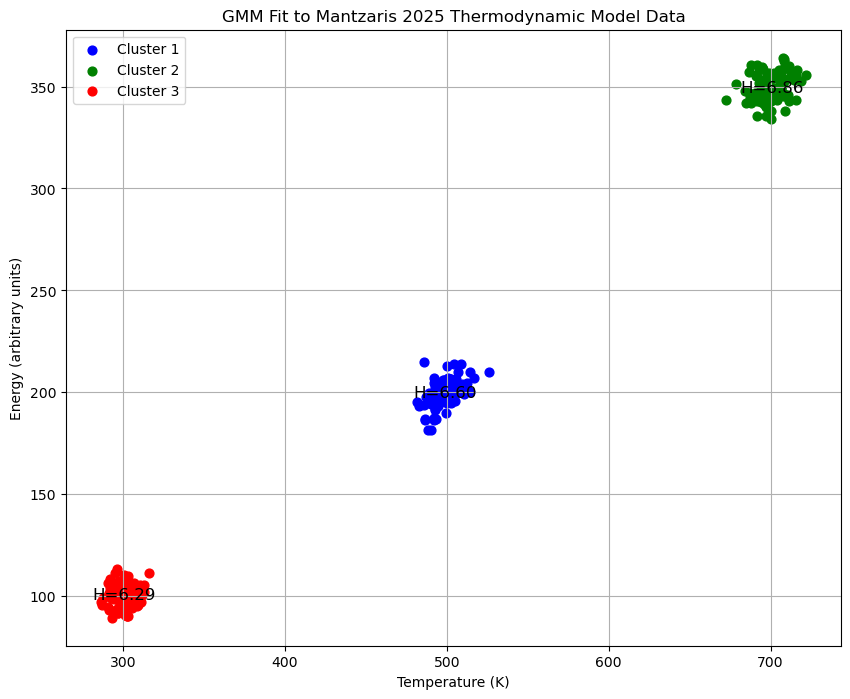

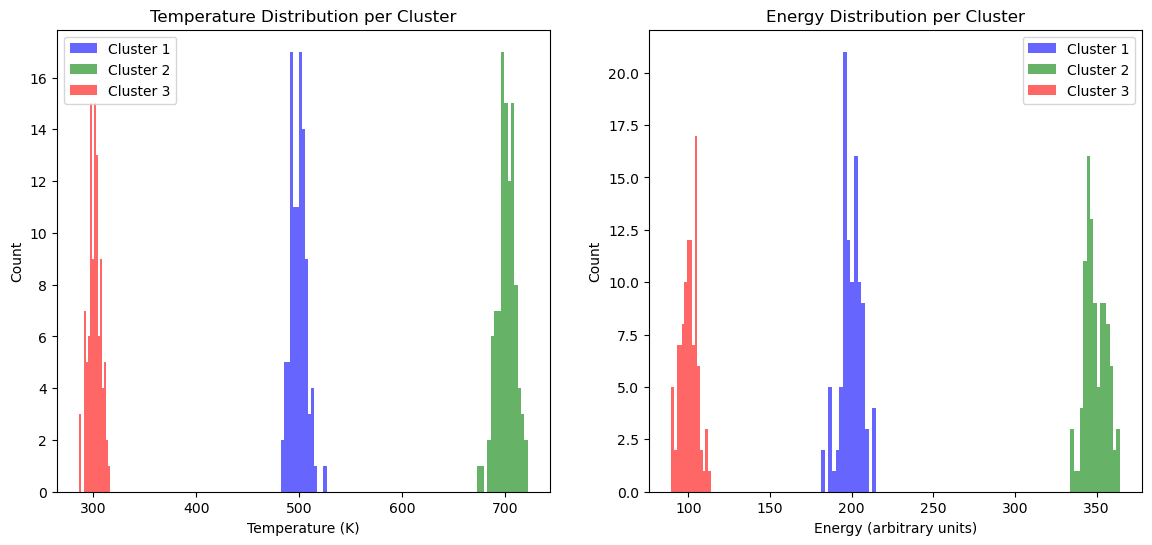

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# ---------------------------
# Data Generation: Simulated Thermodynamic Model (Mantzaris 2025)
# ---------------------------
# We assume that the thermodynamic model yields two key features:
# Temperature (in Kelvin) and Energy (in arbitrary units). 
# Here we simulate three regimes/clusters.

np.random.seed(42)  # for reproducibility

n_samples = 300           # total number of samples
n_per_cluster = n_samples // 3

# Cluster 1: Low temperature, low energy
mean1 = [300, 100]        # Temperature ~300K, Energy ~100
cov1 = [[50, 10], [10, 30]]
data1 = np.random.multivariate_normal(mean1, cov1, n_per_cluster)

# Cluster 2: Moderate temperature, moderate energy
mean2 = [500, 200]
cov2 = [[60, 20], [20, 40]]
data2 = np.random.multivariate_normal(mean2, cov2, n_per_cluster)

# Cluster 3: High temperature, high energy
mean3 = [700, 350]
cov3 = [[70, 15], [15, 50]]
data3 = np.random.multivariate_normal(mean3, cov3, n_per_cluster)

# Combine data from all clusters
data = np.vstack((data1, data2, data3))

# ---------------------------
# Fit a Gaussian Mixture Model (GMM)
# ---------------------------
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data)
labels = gmm.predict(data)

# ---------------------------
# Differential Entropy Calculation
# ---------------------------
# For a d-dimensional Gaussian, the differential entropy is:
#   H = 0.5 * ln((2πe)^d * det(Σ))
def differential_entropy(cov, d=2):
    return 0.5 * np.log(((2 * np.pi * np.e) ** d) * np.linalg.det(cov))

entropies = []
for i in range(gmm.n_components):
    cov = gmm.covariances_[i]
    ent = differential_entropy(cov, d=2)
    entropies.append(ent)
    print(f"Cluster {i+1} differential entropy: {ent:.2f}")

# ---------------------------
# Visualization 1: Scatter Plot with GMM Ellipses and Entropy Annotations
# ---------------------------
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
for i, color in enumerate(colors):
    cluster_data = data[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=40, color=color, label=f'Cluster {i+1}')
    
    # Plot an ellipse corresponding to 2 standard deviations for the covariance matrix
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[order]
    eigenvectors = eigenvectors[:, order]
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(eigenvalues)  # 2 standard deviations
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor=color, fc='None', lw=2)
    plt.gca().add_patch(ellipse)
    
    # Annotate the cluster center with its differential entropy
    plt.text(mean[0], mean[1], f"H={entropies[i]:.2f}", fontsize=12,
             color='black', horizontalalignment='center', verticalalignment='center')

plt.xlabel("Temperature (K)")
plt.ylabel("Energy (arbitrary units)")
plt.title("GMM Fit to Mantzaris 2025 Thermodynamic Model Data")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Visualization 2: Feature Distributions per Cluster
# ---------------------------
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for i, color in enumerate(colors):
    cluster_data = data[labels == i]
    ax[0].hist(cluster_data[:, 0], bins=15, alpha=0.6, color=color, label=f'Cluster {i+1}')
    ax[1].hist(cluster_data[:, 1], bins=15, alpha=0.6, color=color, label=f'Cluster {i+1}')

ax[0].set_xlabel("Temperature (K)")
ax[0].set_ylabel("Count")
ax[0].set_title("Temperature Distribution per Cluster")
ax[0].legend()

ax[1].set_xlabel("Energy (arbitrary units)")
ax[1].set_ylabel("Count")
ax[1].set_title("Energy Distribution per Cluster")
ax[1].legend()

plt.show()

# ---------------------------
# New Model Discussion
# ---------------------------
# The GMM-based model segments the thermodynamic state space into three distinct regimes.
# Differential entropy values provide insight into the spread (or uncertainty) within each cluster.
#
# For example, clusters with higher entropy indicate more variability in the thermodynamic states.
# This new model enables an enhanced understanding of the thermodynamics of the system,
# allowing us to analyze how energy and temperature are distributed across different regimes.


Overall Shannon Entropy (Energy): 3.146540790243728
Cluster 1 Differential Entropy: 2.08
Cluster 2 Differential Entropy: 1.75
Cluster 3 Differential Entropy: 1.98


C:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


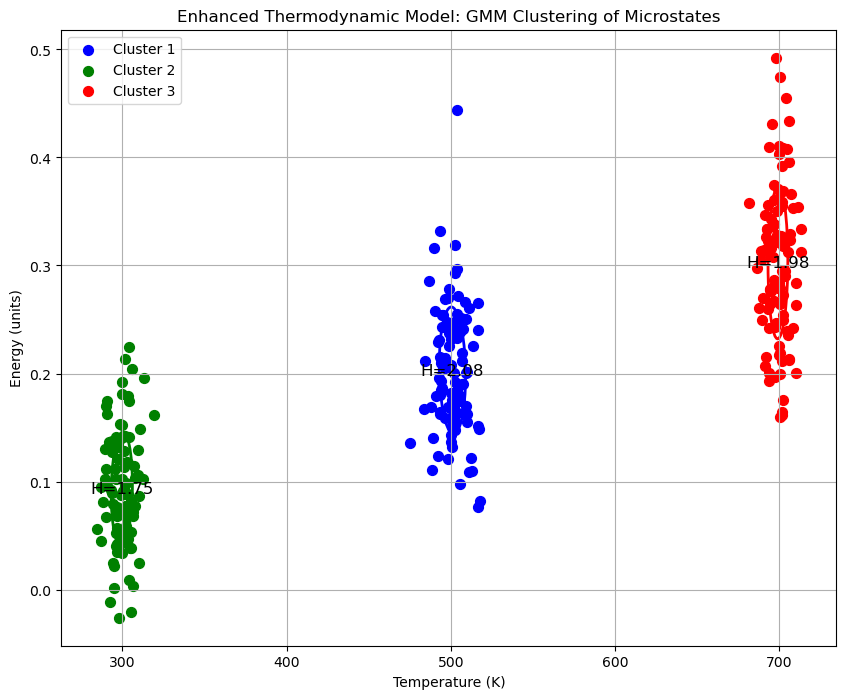

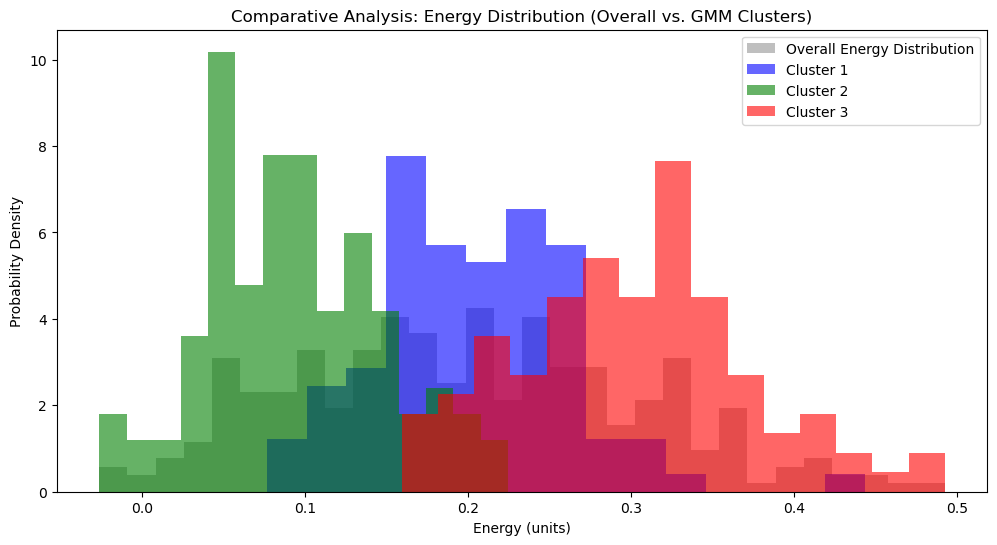

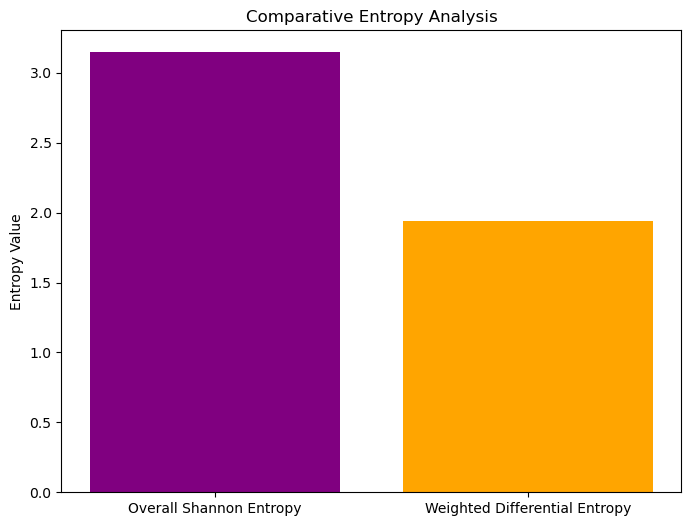

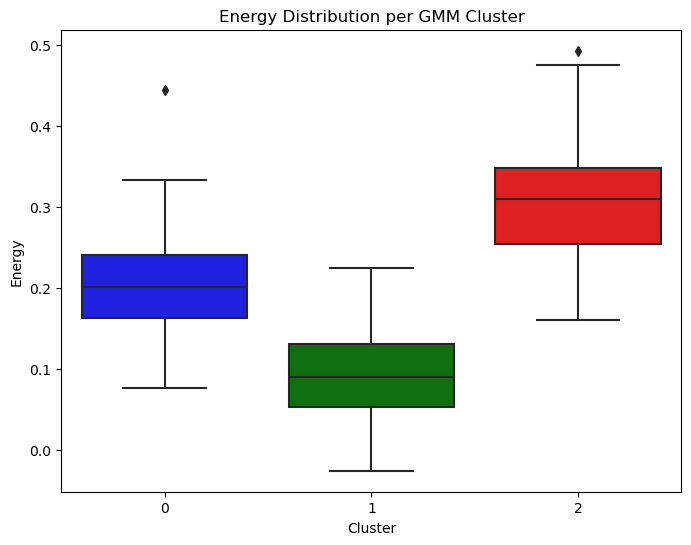

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd

# ----------------------------
# Data Simulation: Enhanced Thermodynamic Microstates
# ----------------------------
# Inspired by Mantzaris (2025), we assume that each bird’s state is characterized 
# by two key variables:
#   Temperature (T) and Energy (E), where Energy is defined inversely to local density.
#
# Here we simulate three regimes:
#   - Dispersed state (early stage): high T and high E (fewer neighbors => higher energy)
#   - Intermediate state: moderate T and E
#   - Flocked state (later stage): low T and low E (many neighbors => lower energy)
#
np.random.seed(42)
n_samples = 300
n_per_cluster = n_samples // 3

# Define means and covariances for three regimes
mean1 = [700, 0.3]   # Dispersed: high temperature, high energy
mean2 = [500, 0.2]   # Intermediate
mean3 = [300, 0.1]   # Flocked: low temperature, low energy

cov1 = [[50, 0], [0, 0.005]]
cov2 = [[60, 0], [0, 0.004]]
cov3 = [[40, 0], [0, 0.003]]

data1 = np.random.multivariate_normal(mean1, cov1, n_per_cluster)
data2 = np.random.multivariate_normal(mean2, cov2, n_per_cluster)
data3 = np.random.multivariate_normal(mean3, cov3, n_per_cluster)
data = np.vstack((data1, data2, data3))
# Data columns: [Temperature, Energy]

# ----------------------------
# Overall Energy Shannon Entropy
# ----------------------------
energy_vals = data[:, 1]
counts, bins = np.histogram(energy_vals, bins=30, density=True)
probabilities = counts / np.sum(counts)
probabilities = probabilities[probabilities > 0]
shannon_entropy = -np.sum(probabilities * np.log(probabilities))
print("Overall Shannon Entropy (Energy):", shannon_entropy)

# ----------------------------
# Fit a Gaussian Mixture Model (GMM)
# ----------------------------
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data)
labels = gmm.predict(data)

# ----------------------------
# Differential Entropy per GMM Cluster
# ----------------------------
# For a d-dimensional Gaussian, differential entropy is given by:
#   H = 0.5 * ln[(2πe)^d * det(Σ)]
def differential_entropy(cov, d=2):
    return 0.5 * np.log(((2 * np.pi * np.e) ** d) * np.linalg.det(cov))

entropies = []
for i in range(gmm.n_components):
    cov_i = gmm.covariances_[i]
    ent = differential_entropy(cov_i, d=2)
    entropies.append(ent)
    print(f"Cluster {i+1} Differential Entropy: {ent:.2f}")

# ----------------------------
# Plot 1: Scatter Plot with GMM Clusters and Ellipse Contours
# ----------------------------
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
ax = plt.gca()
for i, color in enumerate(colors):
    cluster_data = data[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, color=color, label=f'Cluster {i+1}')
    
    # Compute ellipse parameters from covariance
    mean_i = gmm.means_[i]
    cov_i = gmm.covariances_[i]
    eigenvals, eigenvecs = np.linalg.eigh(cov_i)
    order = eigenvals.argsort()[::-1]
    eigenvals = eigenvals[order]
    eigenvecs = eigenvecs[:, order]
    angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
    width, height = 2 * np.sqrt(eigenvals)  # 2 standard deviations
    ellipse = Ellipse(xy=mean_i, width=width, height=height, angle=angle,
                      edgecolor=color, fc='None', lw=2)
    ax.add_patch(ellipse)
    # Annotate with cluster differential entropy
    plt.text(mean_i[0], mean_i[1], f"H={entropies[i]:.2f}", fontsize=12,
             color='black', ha='center', va='center')

plt.xlabel("Temperature (K)")
plt.ylabel("Energy (units)")
plt.title("Enhanced Thermodynamic Model: GMM Clustering of Microstates")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Plot 2: Comparative Energy Distribution Histograms
# ----------------------------
plt.figure(figsize=(12, 6))
plt.hist(energy_vals, bins=30, density=True, alpha=0.5, label='Overall Energy Distribution', color='gray')
for i, color in enumerate(colors):
    cluster_energy = data[labels == i][:, 1]
    plt.hist(cluster_energy, bins=15, density=True, alpha=0.6, label=f'Cluster {i+1}', color=color)
plt.xlabel("Energy (units)")
plt.ylabel("Probability Density")
plt.title("Comparative Analysis: Energy Distribution (Overall vs. GMM Clusters)")
plt.legend()
plt.show()

# ----------------------------
# Plot 3: Entropy Comparison: Overall vs. Weighted Cluster Differential Entropy
# ----------------------------
# Compute weighted average of differential entropies
weights = [np.sum(labels == i) / len(labels) for i in range(gmm.n_components)]
weighted_diff_entropy = np.sum(np.array(weights) * np.array(entropies))

plt.figure(figsize=(8, 6))
plt.bar(["Overall Shannon Entropy", "Weighted Differential Entropy"],
        [shannon_entropy, weighted_diff_entropy],
        color=['purple', 'orange'])
plt.ylabel("Entropy Value")
plt.title("Comparative Entropy Analysis")
plt.show()

# ----------------------------
# Plot 4: Boxplot of Energy per Cluster
# ----------------------------
df = pd.DataFrame(data, columns=["Temperature", "Energy"])
df["Cluster"] = labels
plt.figure(figsize=(8, 6))
sns.boxplot(x="Cluster", y="Energy", data=df, palette=colors)
plt.title("Energy Distribution per GMM Cluster")
plt.show()


C:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


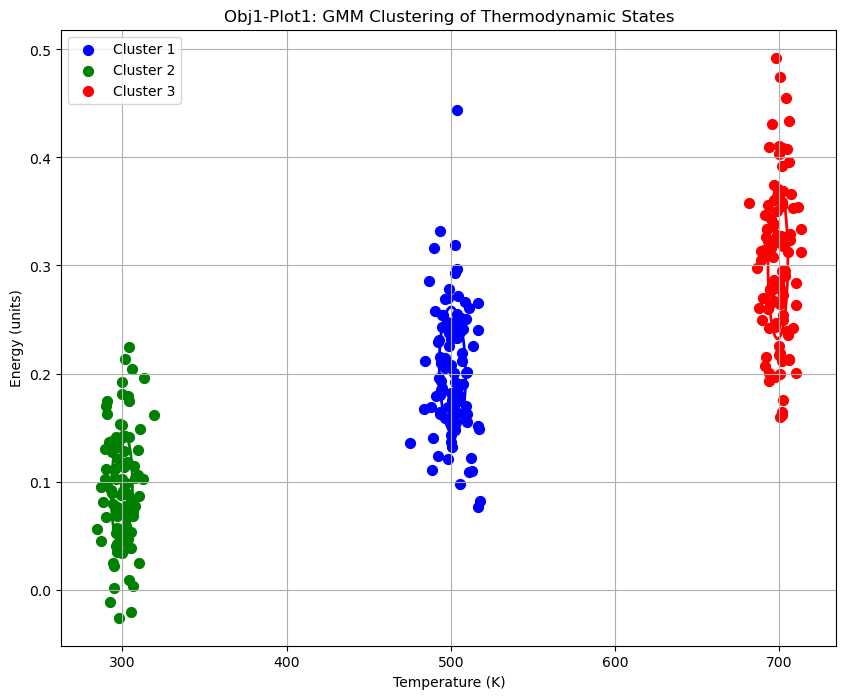

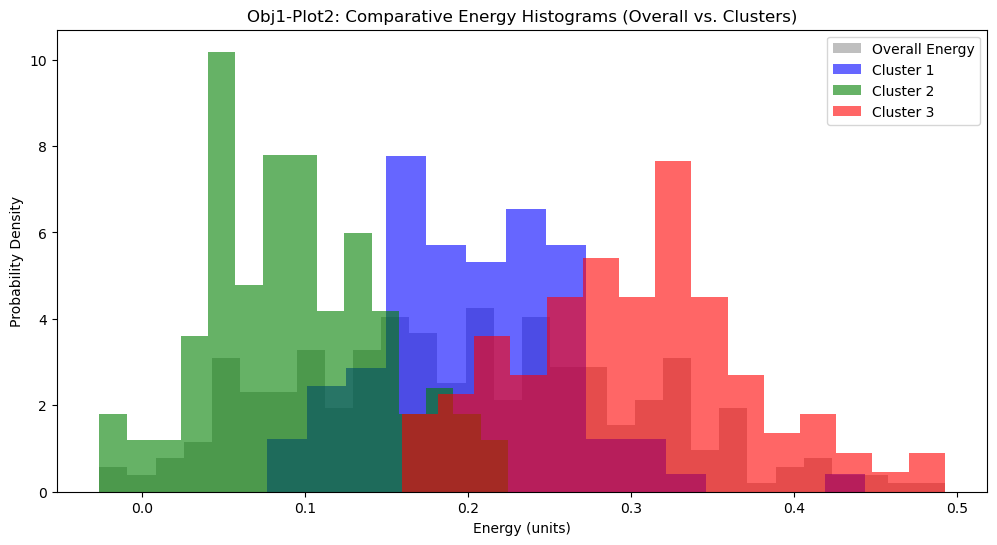

C:\Users\victo\AppData\Local\Temp\ipykernel_34516\2047146577.py:90: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_energy, shade=True, color=color, label=f'Cluster {i+1}')
C:\Users\victo\AppData\Local\Temp\ipykernel_34516\2047146577.py:90: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_energy, shade=True, color=color, label=f'Cluster {i+1}')
C:\Users\victo\AppData\Local\Temp\ipykernel_34516\2047146577.py:90: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_energy, shade=True, color=color, label=f'Cluster {i+1}')


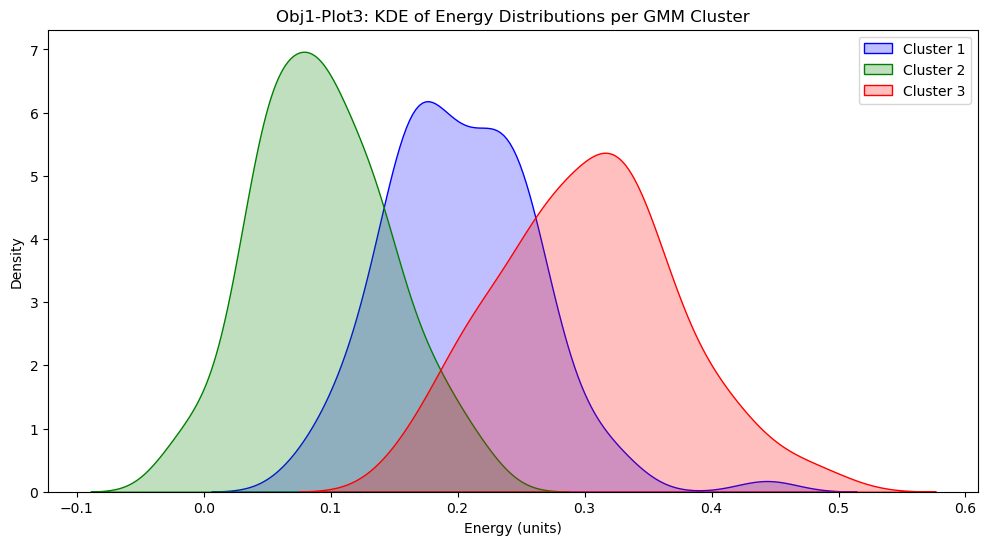

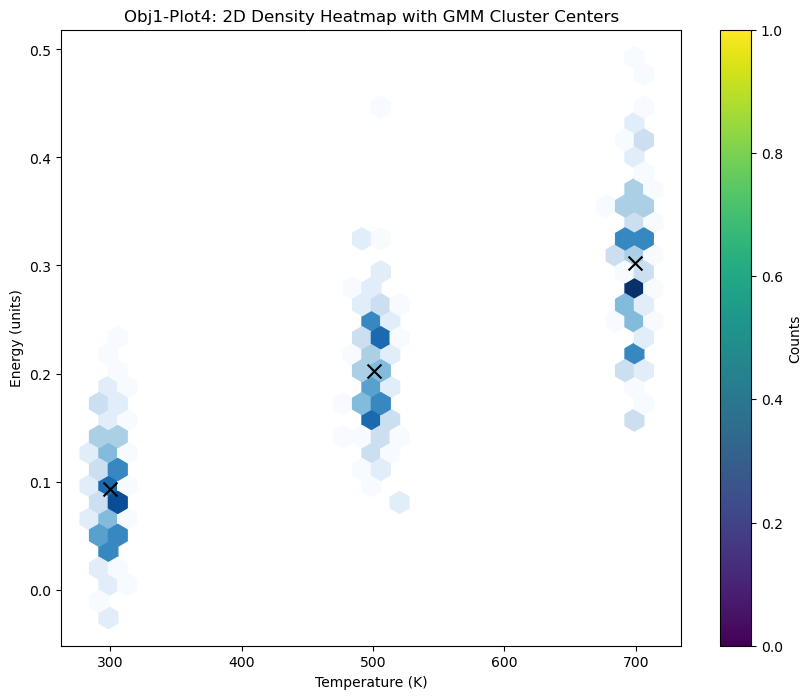

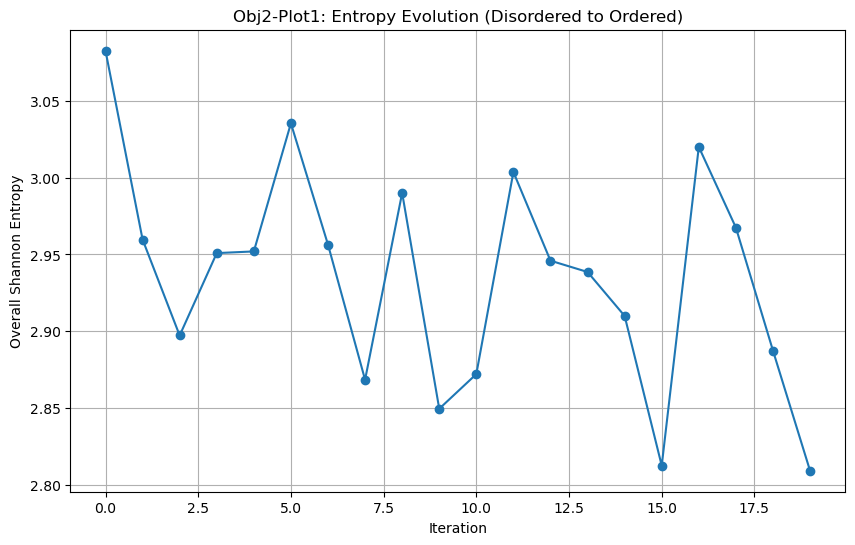

C:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


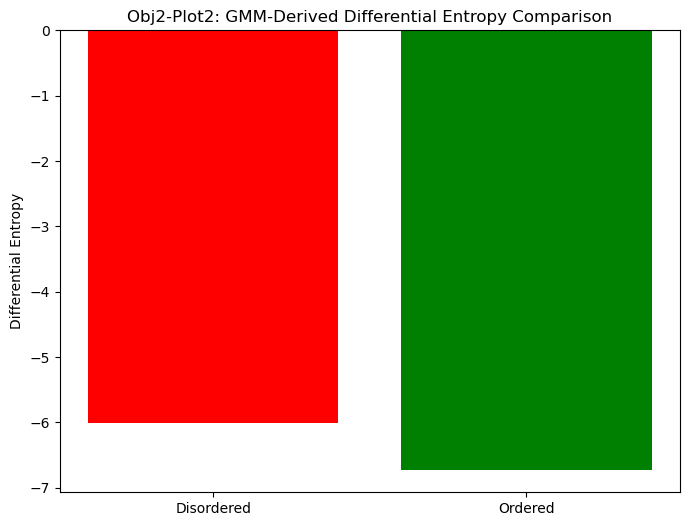

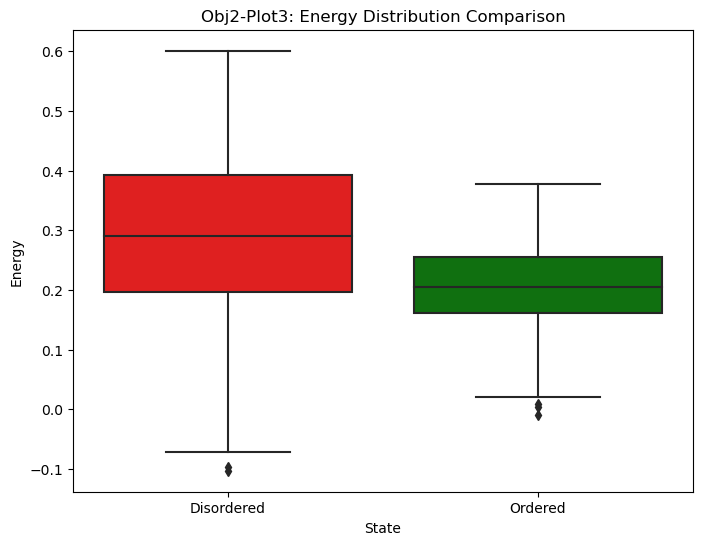

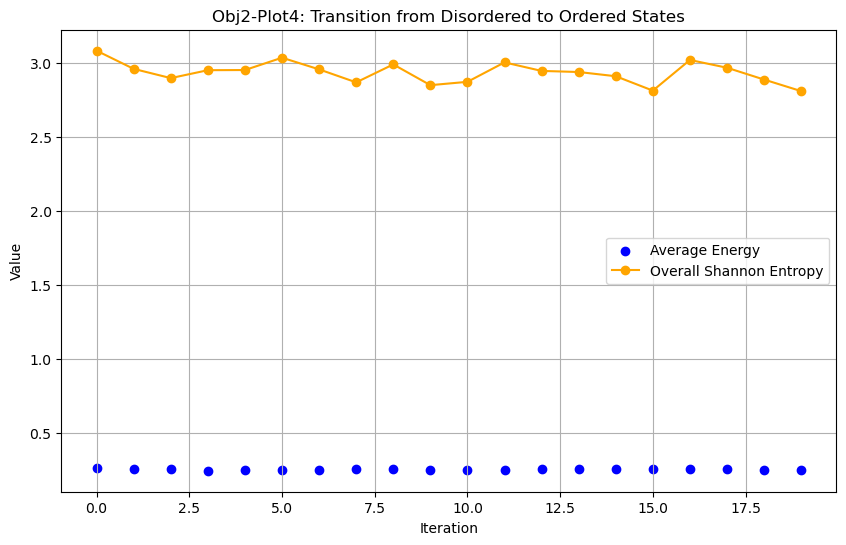

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd

# =============================================================================
# Objective 1: Uncovering Latent Structures in the Energy Landscape via GMM
# =============================================================================
# In this section we simulate a two-dimensional state for each bird:
# Temperature (T) and Energy (E). We assume three latent regimes:
#   - Regime 1 (Dispersed): High T, High E
#   - Regime 2 (Intermediate): Moderate T, Moderate E
#   - Regime 3 (Flocked): Low T, Low E

np.random.seed(42)
n_samples = 300
n_per_cluster = n_samples // 3

# Define means and covariances for the three regimes:
mean1 = [700, 0.30]   # Dispersed: high temperature, high energy
mean2 = [500, 0.20]   # Intermediate state
mean3 = [300, 0.10]   # Flocked: low temperature, low energy

cov1 = [[50, 0], [0, 0.005]]
cov2 = [[60, 0], [0, 0.004]]
cov3 = [[40, 0], [0, 0.003]]

data1 = np.random.multivariate_normal(mean1, cov1, n_per_cluster)
data2 = np.random.multivariate_normal(mean2, cov2, n_per_cluster)
data3 = np.random.multivariate_normal(mean3, cov3, n_per_cluster)
data = np.vstack((data1, data2, data3))
# data columns: [Temperature, Energy]

# Fit a GMM to the overall data
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(data)
labels = gmm.predict(data)

# -----------------------
# Plot 1 (Obj1): Scatter Plot with GMM Clusters and Ellipse Contours
# -----------------------
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
ax = plt.gca()
for i, color in enumerate(colors):
    cluster_data = data[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, color=color, label=f'Cluster {i+1}')
    # Compute ellipse from covariance
    mean_i = gmm.means_[i]
    cov_i = gmm.covariances_[i]
    eigenvals, eigenvecs = np.linalg.eigh(cov_i)
    order = eigenvals.argsort()[::-1]
    eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]
    angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
    width, height = 2 * np.sqrt(eigenvals)  # 2 standard deviations
    ellipse = Ellipse(xy=mean_i, width=width, height=height, angle=angle,
                      edgecolor=color, fc='None', lw=2)
    ax.add_patch(ellipse)
plt.xlabel("Temperature (K)")
plt.ylabel("Energy (units)")
plt.title("Obj1-Plot1: GMM Clustering of Thermodynamic States")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------
# Plot 2 (Obj1): Comparative Histogram of Energy Distributions
# -----------------------
plt.figure(figsize=(12, 6))
# Overall energy histogram
plt.hist(data[:, 1], bins=30, density=True, alpha=0.5, label='Overall Energy', color='gray')
# Overlay histograms for each cluster
for i, color in enumerate(colors):
    cluster_energy = data[labels == i][:, 1]
    plt.hist(cluster_energy, bins=15, density=True, alpha=0.6, label=f'Cluster {i+1}', color=color)
plt.xlabel("Energy (units)")
plt.ylabel("Probability Density")
plt.title("Obj1-Plot2: Comparative Energy Histograms (Overall vs. Clusters)")
plt.legend()
plt.show()

# -----------------------
# Plot 3 (Obj1): KDE Plots of Energy Distributions per Cluster
# -----------------------
plt.figure(figsize=(12, 6))
for i, color in enumerate(colors):
    cluster_energy = data[labels == i][:, 1]
    sns.kdeplot(cluster_energy, shade=True, color=color, label=f'Cluster {i+1}')
plt.xlabel("Energy (units)")
plt.ylabel("Density")
plt.title("Obj1-Plot3: KDE of Energy Distributions per GMM Cluster")
plt.legend()
plt.show()

# -----------------------
# Plot 4 (Obj1): 2D Density Heatmap of Temperature vs. Energy with GMM Boundaries
# -----------------------
plt.figure(figsize=(10, 8))
# Create a 2D histogram (heatmap) of the data
plt.hexbin(data[:, 0], data[:, 1], gridsize=30, cmap='Blues', mincnt=1)
# Overlay cluster means and ellipses (reuse from Plot 1)
for i, color in enumerate(colors):
    mean_i = gmm.means_[i]
    plt.scatter(mean_i[0], mean_i[1], color='black', marker='x', s=100)
plt.xlabel("Temperature (K)")
plt.ylabel("Energy (units)")
plt.title("Obj1-Plot4: 2D Density Heatmap with GMM Cluster Centers")
plt.colorbar(label='Counts')
plt.show()

# =============================================================================
# Objective 2: Using Entropy Measures from GMM Parameters to Signal Transitions
# =============================================================================
# For Objective 2, we simulate a transition from a disordered to an ordered state.
# Here, a disordered state has a broader energy distribution (high variance),
# and an ordered state has a narrower energy distribution (low variance).
# We then compute overall Shannon entropy from the energy histogram as well
# as the differential entropy from GMM parameters.

# --- Simulate time evolution: 20 iterations with decreasing variance ---
iterations = 20
overall_entropies = []
avg_energies = []
# We simulate energy values; variance decreases with iteration to mimic ordering.
for t in range(iterations):
    # Variance linearly decreases from 0.02 (disordered) to 0.005 (ordered)
    var = 0.02 - (0.02 - 0.005) * (t / (iterations - 1))
    # Use a fixed mean energy (say 0.25) for simplicity
    energies_t = np.random.normal(loc=0.25, scale=np.sqrt(var), size=1000)
    avg_energies.append(np.mean(energies_t))
    counts, _ = np.histogram(energies_t, bins=30, density=True)
    probs = counts / np.sum(counts)
    probs = probs[probs > 0]
    overall_entropies.append(-np.sum(probs * np.log(probs)))

# -----------------------
# Plot 1 (Obj2): Time Series of Overall Shannon Entropy vs. Iteration
# -----------------------
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), overall_entropies, marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Overall Shannon Entropy")
plt.title("Obj2-Plot1: Entropy Evolution (Disordered to Ordered)")
plt.grid(True)
plt.show()

# For two representative snapshots, we also fit a GMM to compare differential entropies.
# Snapshot A: Disordered (iteration 0), Snapshot B: Ordered (iteration 19)
# We'll simulate a two-dimensional state for each snapshot: Temperature (fixed) and Energy.

def simulate_state(mean_energy, var, n=300):
    # Temperature fixed for simplicity: add a slight difference per cluster if needed
    temperature = np.full(n, 500)
    energy = np.random.normal(loc=mean_energy, scale=np.sqrt(var), size=n)
    return np.column_stack((temperature, energy))

state_A = simulate_state(mean_energy=0.30, var=0.02, n=300)   # Disordered
state_B = simulate_state(mean_energy=0.20, var=0.005, n=300)  # Ordered

gmm_A = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
gmm_A.fit(state_A)
entropy_A = 0.5 * np.log(((2 * np.pi * np.e)**2) * np.linalg.det(gmm_A.covariances_[0]))

gmm_B = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
gmm_B.fit(state_B)
entropy_B = 0.5 * np.log(((2 * np.pi * np.e)**2) * np.linalg.det(gmm_B.covariances_[0]))

# -----------------------
# Plot 2 (Obj2): Bar Chart Comparing Differential Entropy (GMM) for Disordered vs. Ordered States
# -----------------------
plt.figure(figsize=(8, 6))
states = ['Disordered', 'Ordered']
entropy_vals = [entropy_A, entropy_B]
plt.bar(states, entropy_vals, color=['red', 'green'])
plt.ylabel("Differential Entropy")
plt.title("Obj2-Plot2: GMM-Derived Differential Entropy Comparison")
plt.show()

# -----------------------
# Plot 3 (Obj2): Boxplot of Energy Distributions for Disordered vs. Ordered States
# -----------------------
# For boxplots, we use the energy from the simulated states (state_A and state_B)
df = pd.DataFrame({
    "Energy": np.concatenate([state_A[:, 1], state_B[:, 1]]),
    "State": ["Disordered"]*len(state_A) + ["Ordered"]*len(state_B)
})
plt.figure(figsize=(8, 6))
sns.boxplot(x="State", y="Energy", data=df, palette=['red', 'green'])
plt.title("Obj2-Plot3: Energy Distribution Comparison")
plt.show()

# -----------------------
# Plot 4 (Obj2): Scatter Plot of Iteration vs. Average Energy with Entropy Trend Overlay
# -----------------------
plt.figure(figsize=(10, 6))
plt.scatter(range(iterations), avg_energies, color='blue', label='Average Energy')
plt.plot(range(iterations), overall_entropies, color='orange', marker='o', label='Overall Shannon Entropy')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Obj2-Plot4: Transition from Disordered to Ordered States")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd

In [57]:
# =============================================================================
# Part 1: ABM Flocking Model with Thermodynamic Property
# =============================================================================

# Parameters for the simulation
num_birds = 100          # number of birds/agents
num_iterations = 200     # simulation iterations
width, height = 100, 100  # simulation area size

# Flocking parameters
visual_distance = 15.0   # radius to consider neighbors
separation_distance = 5.0  # minimum allowed distance to avoid crowding
cohesion_factor = 0.005  # weight for cohesion
separation_factor = 0.05 # weight for separation (stronger repulsion)
alignment_factor = 0.05  # weight for alignment
max_speed = 4.0          # maximum speed for a bird

In [59]:
# Thermodynamic parameter (for energy calculation)
# Energy is defined here as: E = 1 / (number of neighbors + eps)
eps = 1e-6


In [61]:
# Define a Bird class
class Bird:
    def __init__(self, pos, vel):
        self.pos = np.array(pos, dtype=float)
        self.vel = np.array(vel, dtype=float)
        self.energy = None  # will be computed later based on local density

    def update(self, birds):
        # Find neighbors within visual_distance (excluding self)
        neighbors = []
        for other in birds:
            if other is not self:
                dist = np.linalg.norm(self.pos - other.pos)
                if dist < visual_distance:
                    neighbors.append((other, dist))
        n_neighbors = len(neighbors)
        
        # Compute forces: cohesion, separation, alignment
        cohesion = np.zeros(2)
        separation = np.zeros(2)
        alignment = np.zeros(2)
        
        if n_neighbors > 0:
            # Cohesion: steer toward average position of neighbors
            avg_pos = np.mean([nb[0].pos for nb in neighbors], axis=0)
            cohesion = (avg_pos - self.pos) * cohesion_factor

            # Separation: steer away from too-close neighbors
            for nb, dist in neighbors:
                if dist < separation_distance:
                    separation -= (nb.pos - self.pos) * separation_factor

            # Alignment: steer toward average velocity of neighbors
            avg_vel = np.mean([nb[0].vel for nb in neighbors], axis=0)
            alignment = (avg_vel - self.vel) * alignment_factor

        # Update velocity with the three contributions
        self.vel += cohesion + separation + alignment

        # Limit speed to max_speed
        speed = np.linalg.norm(self.vel)
        if speed > max_speed:
            self.vel = (self.vel / speed) * max_speed

        # Update position (with simple wrap-around boundaries)
        self.pos += self.vel
        self.pos[0] = self.pos[0] % width
        self.pos[1] = self.pos[1] % height

        # For thermodynamic property: define energy as inverse of local density
        # (more neighbors => lower energy)
        self.energy = 1.0 / (n_neighbors + eps)
        

In [63]:
# Initialize birds with random positions and velocities
birds = []
for _ in range(num_birds):
    pos = [np.random.uniform(0, width), np.random.uniform(0, height)]
    angle = np.random.uniform(0, 2*np.pi)
    speed = np.random.uniform(0, max_speed)
    vel = [speed * np.cos(angle), speed * np.sin(angle)]
    birds.append(Bird(pos, vel))


In [65]:
# Simulation loop
# For storing final state features: positions, velocities, energies, and speed
final_positions = []
final_velocities = []
final_energies = []
final_speeds = []

for t in range(num_iterations):
    # Update each bird
    for bird in birds:
        bird.update(birds)
    # Optionally, one could record intermediate states to track dynamics
    if t == num_iterations - 1:
        for bird in birds:
            final_positions.append(bird.pos.copy())
            final_velocities.append(bird.vel.copy())
            final_energies.append(bird.energy)
            final_speeds.append(np.linalg.norm(bird.vel))

final_positions = np.array(final_positions)
final_velocities = np.array(final_velocities)
final_energies = np.array(final_energies)
final_speeds = np.array(final_speeds)

In [66]:
# =============================================================================
# Part 2: GMM Enhanced Model & Thermodynamic Analysis
# =============================================================================
# We now build an enhanced model by fitting a GMM to the final thermodynamic state.
# We choose two features: energy and speed.
features = np.column_stack((final_energies, final_speeds))

# Fit a GMM with 3 components (we assume latent microstates)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(features)
gmm_labels = gmm.predict(features)



C:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [67]:
# Compute overall Shannon entropy from the energy distribution
counts, bins = np.histogram(final_energies, bins=30, density=True)
probs = counts / np.sum(counts)
probs = probs[probs > 0]
overall_shannon_entropy = -np.sum(probs * np.log(probs))
print("Overall Shannon Entropy (Energy):", overall_shannon_entropy)

Overall Shannon Entropy (Energy): 2.2329573488421546


In [71]:
# Differential entropy for each GMM cluster (for d=2 features)
def differential_entropy(cov, d=2):
    return 0.5 * np.log(((2 * np.pi * np.e) ** d) * np.linalg.det(cov))

cluster_diff_entropies = []
for i in range(gmm.n_components):
    cov_i = gmm.covariances_[i]
    de = differential_entropy(cov_i, d=2)
    cluster_diff_entropies.append(de)
    print(f"Cluster {i+1} Differential Entropy: {de:.2f}")


Cluster 1 Differential Entropy: -1.09
Cluster 2 Differential Entropy: -2.10
Cluster 3 Differential Entropy: -7.51


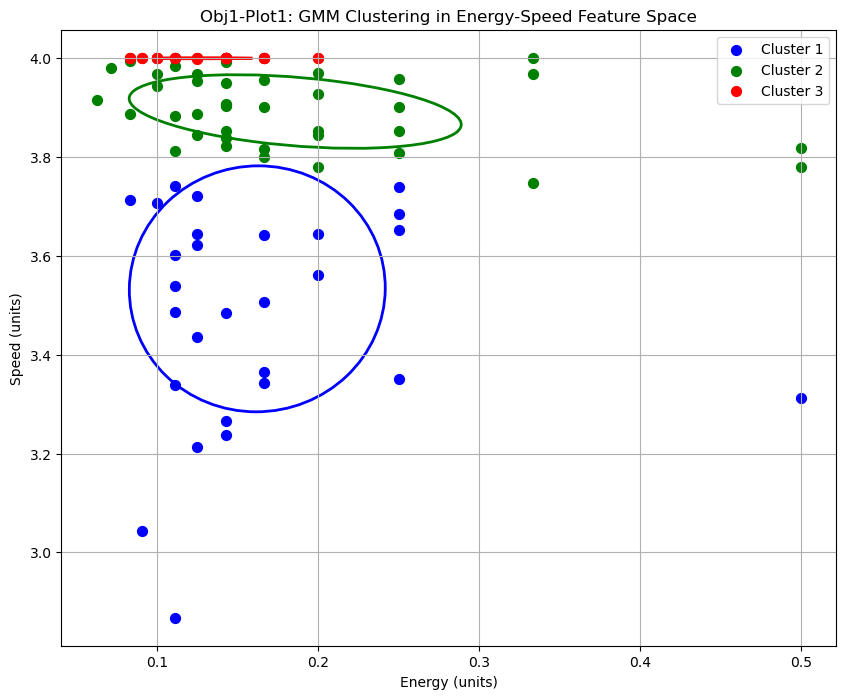

In [73]:
# =============================================================================
# Part 3: Diagnostic Plots
# =============================================================================

# ---------- Objective 1 Plots: Uncovering Latent Structures ----------
# Plot 1: Scatter Plot of Final Features with GMM Cluster Ellipses
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
ax = plt.gca()
for i, color in enumerate(colors):
    cluster_data = features[gmm_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, color=color, label=f'Cluster {i+1}')
    
    # Draw ellipse corresponding to covariance
    mean_i = gmm.means_[i]
    cov_i = gmm.covariances_[i]
    eigenvals, eigenvecs = np.linalg.eigh(cov_i)
    order = eigenvals.argsort()[::-1]
    eigenvals, eigenvecs = eigenvals[order], eigenvecs[:, order]
    angle = np.degrees(np.arctan2(eigenvecs[1, 0], eigenvecs[0, 0]))
    width, height = 2 * np.sqrt(eigenvals)
    ellipse = Ellipse(xy=mean_i, width=width, height=height, angle=angle,
                      edgecolor=color, fc='None', lw=2)
    ax.add_patch(ellipse)
plt.xlabel("Energy (units)")
plt.ylabel("Speed (units)")
plt.title("Obj1-Plot1: GMM Clustering in Energy-Speed Feature Space")
plt.legend()
plt.grid(True)
plt.show()

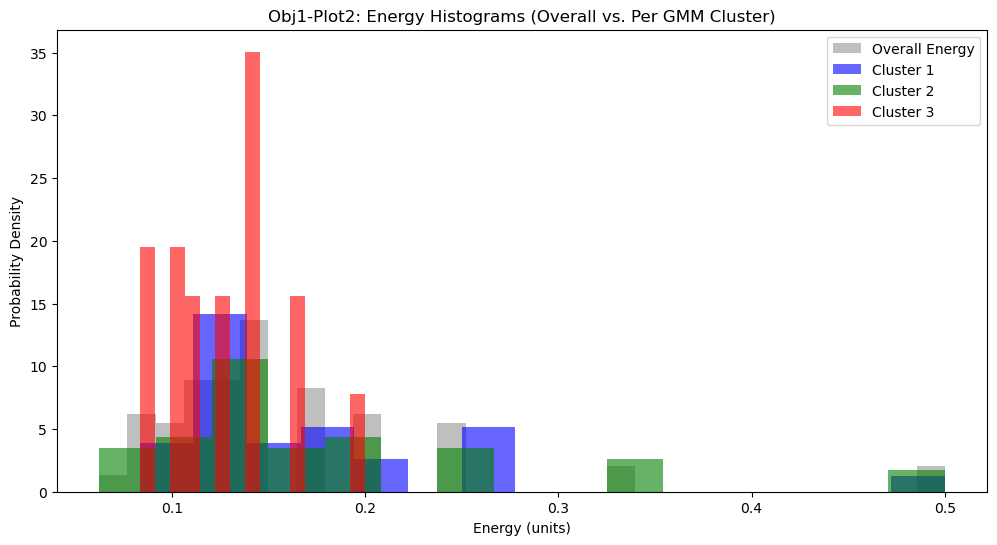

In [75]:
# Plot 2: Comparative Histogram of Energy Distributions (Overall vs. Clusters)
plt.figure(figsize=(12, 6))
plt.hist(final_energies, bins=30, density=True, alpha=0.5, label='Overall Energy', color='gray')
for i, color in enumerate(colors):
    cluster_energy = final_energies[gmm_labels == i]
    plt.hist(cluster_energy, bins=15, density=True, alpha=0.6, label=f'Cluster {i+1}', color=color)
plt.xlabel("Energy (units)")
plt.ylabel("Probability Density")
plt.title("Obj1-Plot2: Energy Histograms (Overall vs. Per GMM Cluster)")
plt.legend()
plt.show()

C:\Users\victo\AppData\Local\Temp\ipykernel_34516\1056877974.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_speed, shade=True, color=color, label=f'Cluster {i+1}')
C:\Users\victo\AppData\Local\Temp\ipykernel_34516\1056877974.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_speed, shade=True, color=color, label=f'Cluster {i+1}')
C:\Users\victo\AppData\Local\Temp\ipykernel_34516\1056877974.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_speed, shade=True, color=color, label=f'Cluster {i+1}')


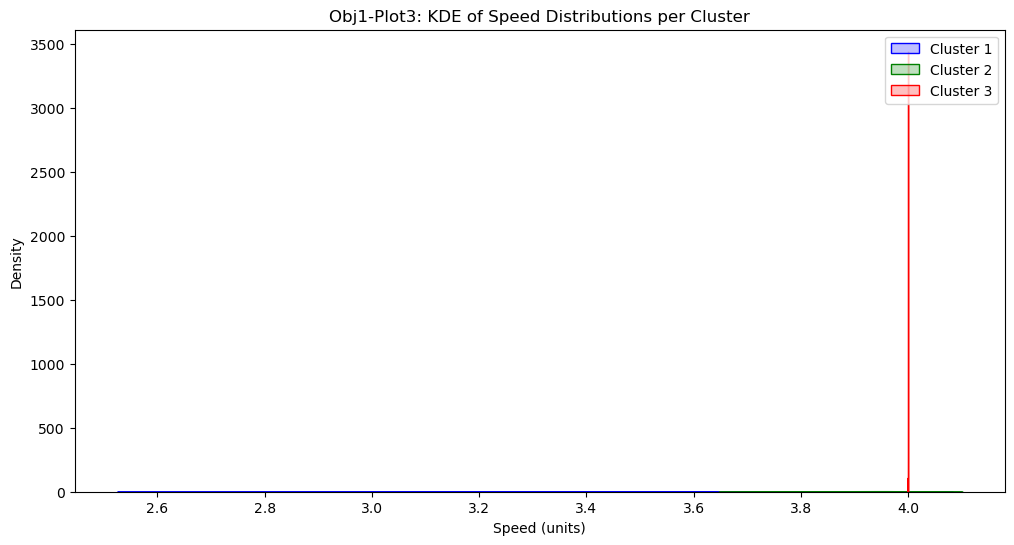

In [79]:

# Plot 3: KDE Plots of Speed Distributions per GMM Cluster
plt.figure(figsize=(12, 6))
for i, color in enumerate(colors):
    cluster_speed = final_speeds[gmm_labels == i]
    sns.kdeplot(cluster_speed, shade=True, color=color, label=f'Cluster {i+1}')
plt.xlabel("Speed (units)")
plt.ylabel("Density")
plt.title("Obj1-Plot3: KDE of Speed Distributions per Cluster")
plt.legend()
plt.show()


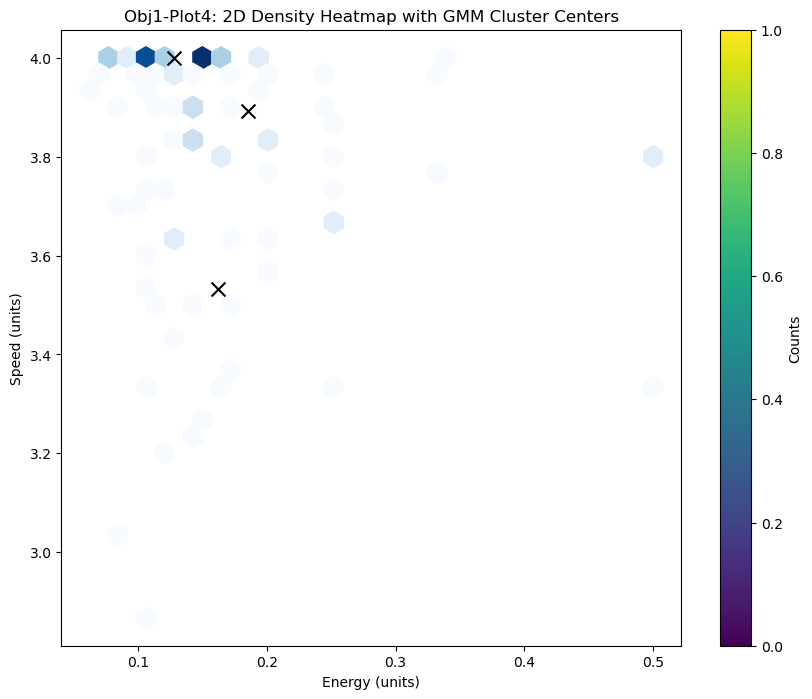

In [81]:
# Plot 4: 2D Density Heatmap of the Feature Space with Cluster Means
plt.figure(figsize=(10, 8))
plt.hexbin(features[:, 0], features[:, 1], gridsize=30, cmap='Blues', mincnt=1)
for i, color in enumerate(colors):
    mean_i = gmm.means_[i]
    plt.scatter(mean_i[0], mean_i[1], color='black', marker='x', s=100, label=f'Cluster {i+1} Center' if i==0 else "")
plt.xlabel("Energy (units)")
plt.ylabel("Speed (units)")
plt.title("Obj1-Plot4: 2D Density Heatmap with GMM Cluster Centers")
plt.colorbar(label='Counts')
plt.show()

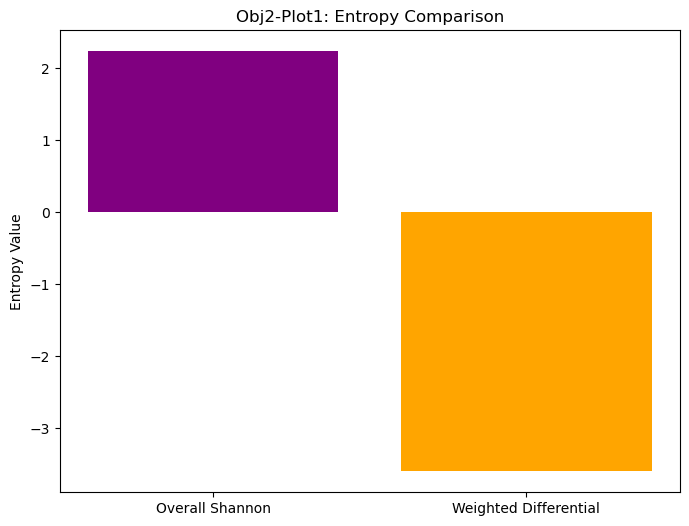

In [83]:
# ---------- Objective 2 Plots: Entropy Measures & Transition Signals ----------
# For Objective 2, we consider that as the system evolves from a disordered to an ordered state,
# the energy distribution narrows and entropy (both overall and cluster-based) decreases.
# Here we use our simulation final state as the “ordered” state.
# (In practice, one would compare snapshots at different times; here we illustrate with the final state.)

# Plot 1 (Obj2): Bar Chart of Overall Shannon Entropy vs. Weighted GMM Differential Entropy
weights = [np.sum(gmm_labels == i) / len(gmm_labels) for i in range(gmm.n_components)]
weighted_diff_entropy = np.sum(np.array(weights) * np.array(cluster_diff_entropies))
plt.figure(figsize=(8, 6))
plt.bar(["Overall Shannon", "Weighted Differential"], 
        [overall_shannon_entropy, weighted_diff_entropy], 
        color=['purple', 'orange'])
plt.ylabel("Entropy Value")
plt.title("Obj2-Plot1: Entropy Comparison")
plt.show()

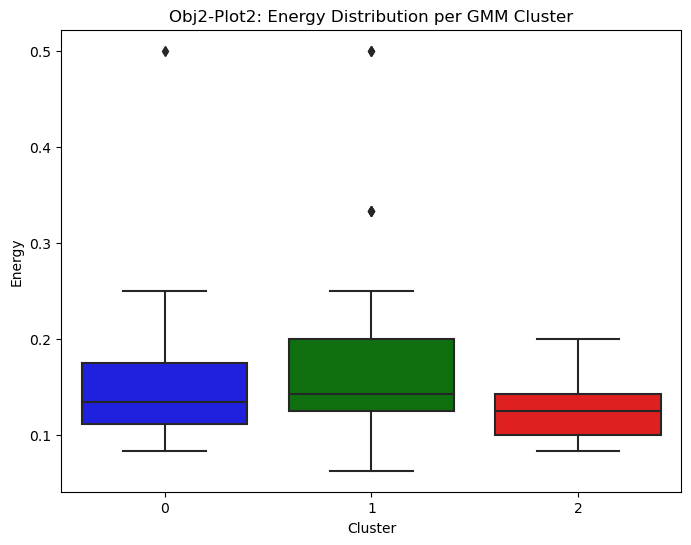

In [85]:
# Plot 2 (Obj2): Boxplot of Energy per GMM Cluster
df = pd.DataFrame({
    "Energy": final_energies,
    "Cluster": gmm_labels
})
plt.figure(figsize=(8, 6))
sns.boxplot(x="Cluster", y="Energy", data=df, palette=colors)
plt.title("Obj2-Plot2: Energy Distribution per GMM Cluster")
plt.show()


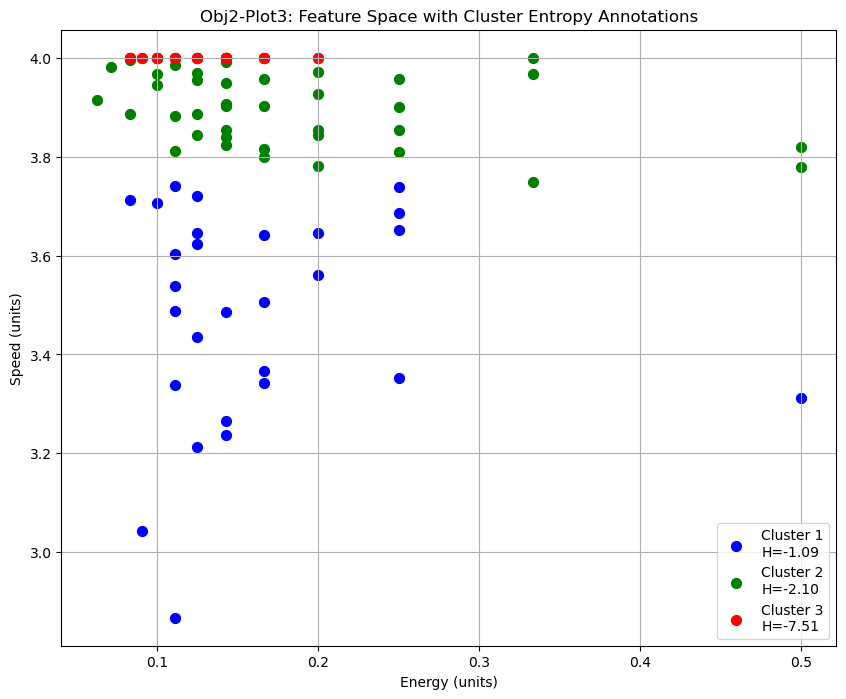

In [87]:
# Plot 3 (Obj2): Scatter Plot of Energy vs. Speed Colored by GMM Cluster with Entropy Annotation
plt.figure(figsize=(10, 8))
for i, color in enumerate(colors):
    cluster_data = features[gmm_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, color=color, label=f'Cluster {i+1}\nH={cluster_diff_entropies[i]:.2f}')
plt.xlabel("Energy (units)")
plt.ylabel("Speed (units)")
plt.title("Obj2-Plot3: Feature Space with Cluster Entropy Annotations")
plt.legend()
plt.grid(True)
plt.show()

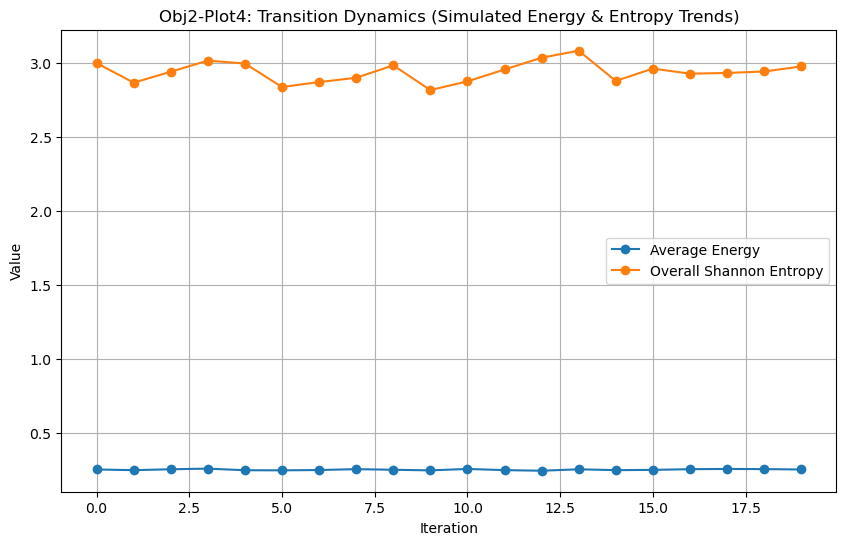

In [89]:
# Plot 4 (Obj2): Time Evolution Simulation (Energy & Entropy Trend)
# Here we simulate a simple transition: start with high variance energy and gradually reduce variance.
iterations = 20
avg_energy_trend = []
entropy_trend = []
for t in range(iterations):
    var_t = 0.02 - (0.02 - 0.005) * (t / (iterations - 1))
    energies_t = np.random.normal(loc=0.25, scale=np.sqrt(var_t), size=1000)
    avg_energy_trend.append(np.mean(energies_t))
    cnt, _ = np.histogram(energies_t, bins=30, density=True)
    pr = cnt / np.sum(cnt)
    pr = pr[pr > 0]
    entropy_trend.append(-np.sum(pr * np.log(pr)))

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), avg_energy_trend, marker='o', label='Average Energy')
plt.plot(range(iterations), entropy_trend, marker='o', label='Overall Shannon Entropy')
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Obj2-Plot4: Transition Dynamics (Simulated Energy & Entropy Trends)")
plt.legend()
plt.grid(True)
plt.show()